# Первая часть. Исследование

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data_test=pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на случайные данные

In [ ]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4636,71,24.65,1710.15,Female,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
5138,4,19.55,68.8,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
832,12,25.25,274.7,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
4939,13,67.80,842.25,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),0
4946,42,73.90,3160.55,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),1


Посчитаем количество NaN и null в таблице

In [ ]:
data.isna().sum()+data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных

Посмотрим разные величины у численных признаков

In [ ]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


В столбце TotalSpent есть какие-то нечисловые значения, потому что в .describe() этот столбец не отобразился. Сначала заменим их на Nan, потом заполним все NaN средними значениями.

In [ ]:
TotalSpent=pd.to_numeric(data['TotalSpent'], errors='coerce')
data['TotalSpent']=TotalSpent.fillna(TotalSpent.mean())
TotalSpent=pd.to_numeric(data_test['TotalSpent'], errors='coerce')
data_test['TotalSpent']=TotalSpent.fillna(TotalSpent.mean())

0

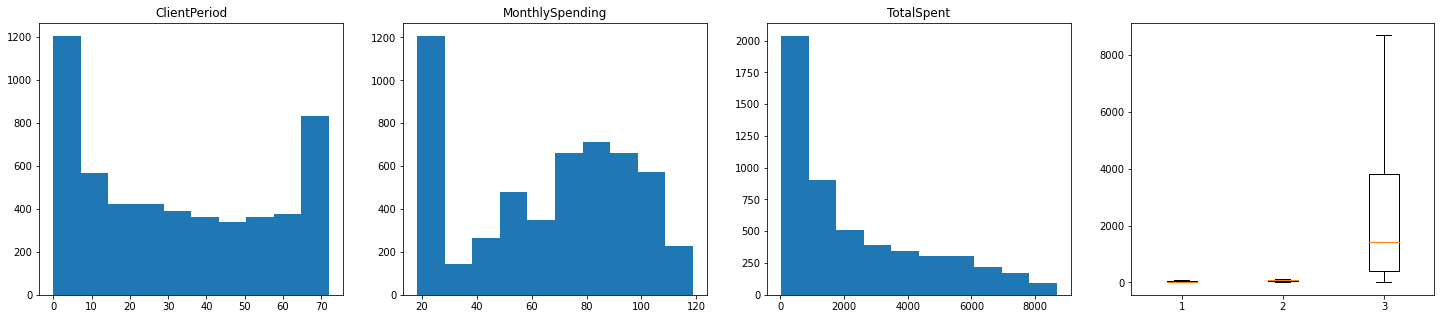

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(25,5))
for i, col in enumerate(num_cols):
  ax[i].set_title(col)
  ax[i].hist(data[col].values)
ax[3].boxplot(data[num_cols].transpose())
0

Построим диаграммы для каждого типа данных

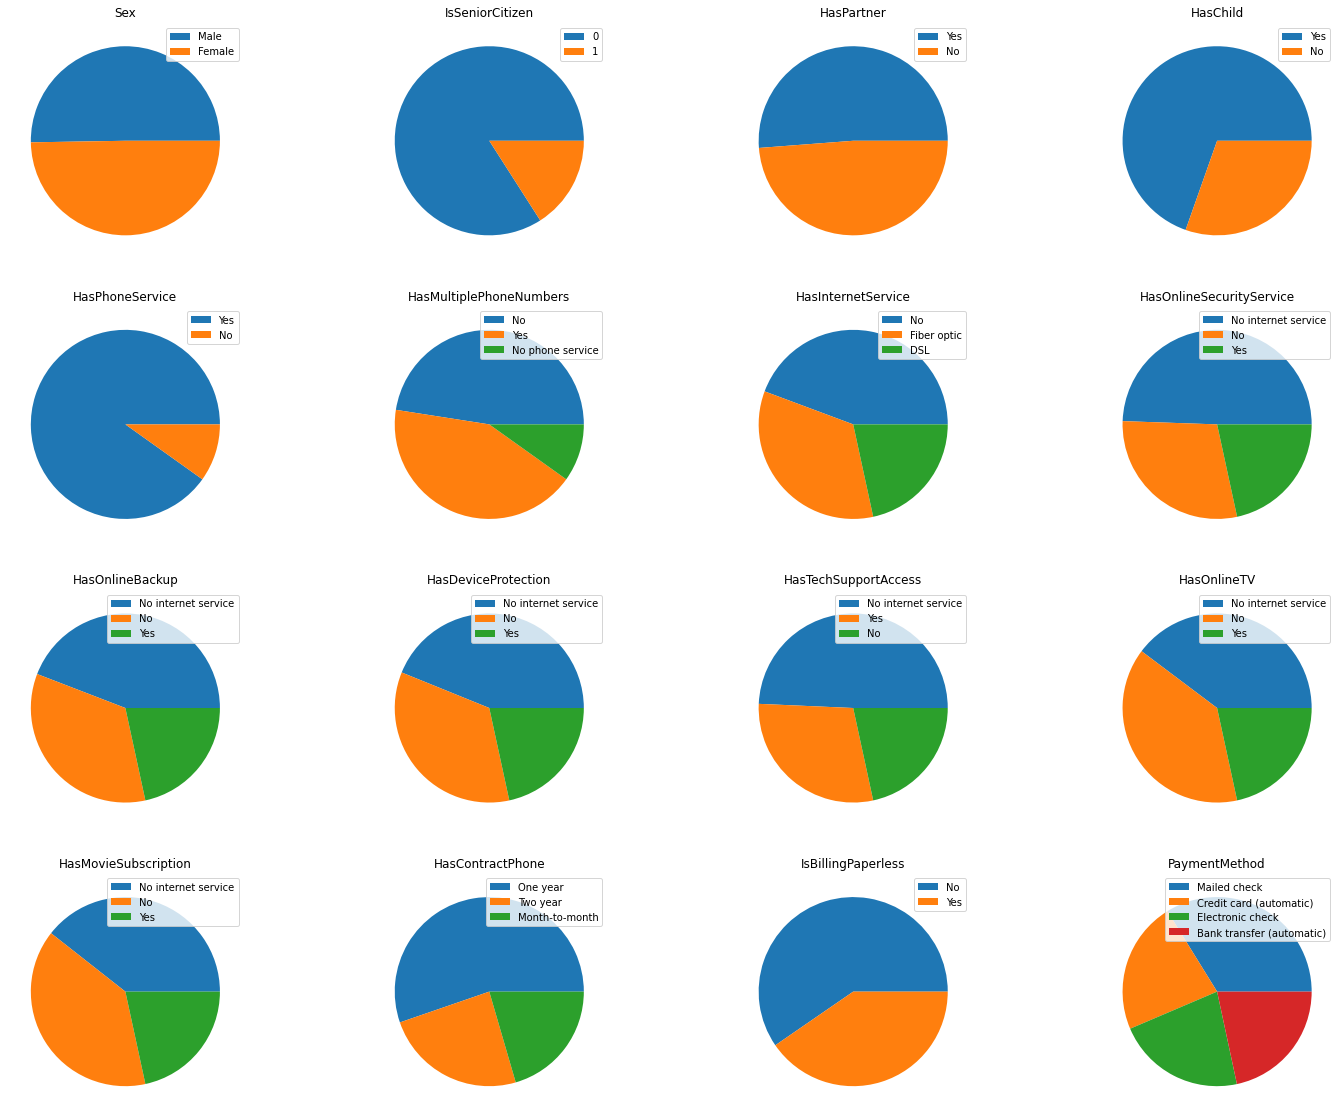

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(25,20))
ax=ax.ravel()
for i, col in enumerate(cat_cols):
  ax[i].set_title(col)
  arr=data[col].value_counts()
  ax[i].pie(arr)
  ax[i].legend(data[col].unique())

Посмотрим сбалансированность target переменной

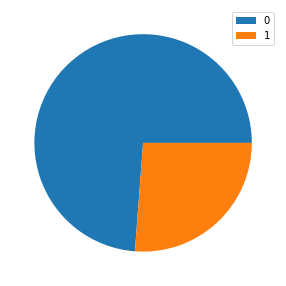

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(data[target_col].value_counts())
plt.legend(data[target_col].unique())

## Применение линейных моделей

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Применяем one-hot encoding. Также копируем начальные данные в отдельные переменные, потому что данные будут меняться.

In [ ]:
data_cat=pd.get_dummies(data[cat_cols], drop_first=True)
data_test_cat=pd.get_dummies(data_test[cat_cols], drop_first=True)
y=data[target_col]

data_origin=data.iloc[:]
data_test_origin=data_test.iloc[:]

data=pd.concat([data[num_cols],data_cat],axis=1)
data_test=pd.concat([data_test[num_cols],data_test_cat],axis=1)

Разбиваем тренировочные данные на тренировочную и тестовую подвыборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size=0.8)

Производим нормирование числовых данных

In [ ]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2386,-1.089337,-1.501970,-0.976988,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1
380,-0.844511,0.465096,-0.604481,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0
2990,0.502034,-0.470500,0.005108,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2038,0.665252,1.007278,1.079409,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2277,1.114100,-0.153125,0.601803,0,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,-1.293359,-0.515131,-0.996679,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4500,1.603753,-1.349894,-0.238355,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
1832,-0.926120,1.161007,-0.551504,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
228,0.379621,0.045235,0.193203,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0


## Обучение моделей

Обучаем сначала модели: логистическая регрессия, knn, решающее дерево. Обучаем методом подбора гиперпараметров по сетке.

best - параметр, который будет показывать лучшую roc_auc среди моделей.
Дальше по коду появится переменная best_model, которая показывает лучшую модель (неужели)

In [ ]:
best=-1

In [ ]:
grid=[0.001, 0.01, 0.1, 1, 10, 30, 50, 100]
parameters={'C' : grid}
Reg_model = GridSearchCV(estimator=LogisticRegression(), 
                            param_grid=parameters,
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            refit=True,
                            verbose=0)
Reg_model.fit(data,y)
print("train score =",Reg_model.best_score_, "| best parameter =", Reg_model.best_params_)
best=Reg_model.best_score_
best_model=Reg_model

train score = 0.8424747908739117 | best parameter = {'C': 50}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
grid=np.linspace(4, 100, 10, dtype=int)
parameters = {'n_neighbors': grid}
KNN_model = GridSearchCV(estimator=KNeighborsClassifier(), 
                            param_grid=parameters,
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            refit=True,
                            verbose=0)
KNN_model.fit(data,y)
print("train score =",KNN_model.best_score_, "| best parameter =", KNN_model.best_params_)

if (best<KNN_model.best_score_): 
  best=KNN_model.best_score_
  best_model=KNN_model

train score = 0.7794512279636092 | best parameter = {'n_neighbors': 25}


In [ ]:
grid=np.linspace(1, 30, dtype=int)
parameters = {'max_depth': grid}
Tree_model = GridSearchCV(estimator=DecisionTreeClassifier(), 
                            param_grid=parameters,
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            refit=True,
                            verbose=0)
Tree_model.fit(data,y)
print("train score =",Tree_model.best_score_, "| best parameter =", Tree_model.best_params_)

if (best<Tree_model.best_score_): 
  best=Tree_model.best_score_
  best_model=Tree_model

train score = 0.8203553714143533 | best parameter = {'max_depth': 5}


## Применение градиентного бустинга catboost

In [ ]:
#!pip install catboost

Сначала обычный бустинг с базовыми параметрами

In [ ]:
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(data_origin[num_cols+cat_cols], y, train_size=0.8)
boosting_model = catboost.CatBoostClassifier(n_estimators=500,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_model.fit(X_train, y_train, verbose=0)
y_pred=boosting_model.predict_proba(X_test)[:,1]
print("score =",roc_auc_score(y_test, y_pred))
if (best<roc_auc_score(y_test, y_pred)):
  best=roc_auc_score(y_test, y_pred)
  best_model=boosting_model

NameError: ignored

Я попробовал GridSearchCV, но там вознилка проблема в самом устройстве catboost (он не мог одновременно менять параметры), поэтому я решил перебирать параметры по сетке с помощью grid_search

In [ ]:
parameters={'max_depth':[3,4,5],
            'iterations':[100,200,300],
            'learning_rate':np.linspace(0,0.2,5)}

boosting_model_v2 = CatBoostClassifier(cat_features=cat_cols,
                                    verbose=0)

res=boosting_model_v2.grid_search(parameters, X_train, y_train, verbose=0)
y_pred=boosting_model_v2.predict_proba(X_test)[:,1]
print("score =",roc_auc_score(y_test,y_pred))
if (best<roc_auc_score(y_test, y_pred)):
  best=roc_auc_score(y_test, y_pred)
  best_model=boosting_model_v2

Посмотрим теперь какое из всех моделей у нас получилось лучшее качество и у какой модели оно было

In [ ]:
print(best)
print(best_model)

# Предсказания

In [ ]:
answers=best_model.predict_proba(data_test_origin)[:,1]

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/submission.csv')
submission['Churn'] = answers
submission.to_csv('/content/drive/MyDrive/my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.